1. Sınav sonuçları normal dağılımlı mıdır? Değilse normal dağılıma sahip hale getirmek için ne yapabiliriz?

2. Üç sınav sonucunu tek bir değişkende, hedef değişkeni olarak tutmak istiyoruz. 
Bunun için üç sınavın ortalamasını içeren yeni bir değişken tanımlayın. 
Bu yeni değişkenin ortalamasının normal dağılımlı olup olmadığını test edin. 
Eğer normal dağılıma sahip değilse dönüşüm yaparak normal dağılımlı hale getirmeye çalışın ve dönüşümün sonucunu test edin.

3. Bir önceki soruda oluşturduğumuz hedef değişkeni ile hangi değişkenler ilişkili görünüyor? 
Eğer amacımız sınav başarısını belirleyen etkenleri açıklamak olsaydı hangi değişkenleri veri kümemizde tutmamız gerekirdi?

In [1]:
#1

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

ogrenciler = pd.read_csv("veri_kumeleri/StudentsPerformance.csv")
ogrenciler.columns = ['cinsiyet', 'koken', 'aile_egt_seviyesi', 'ogle_yemegi','hazirlik_kursu', 
                      'matematik_notu', 'okuma_notu', 'yazma_notu']
ogrenciler.head()

,cinsiyet,koken,aile_egt_seviyesi,ogle_yemegi,hazirlik_kursu,matematik_notu,okuma_notu,yazma_notu
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


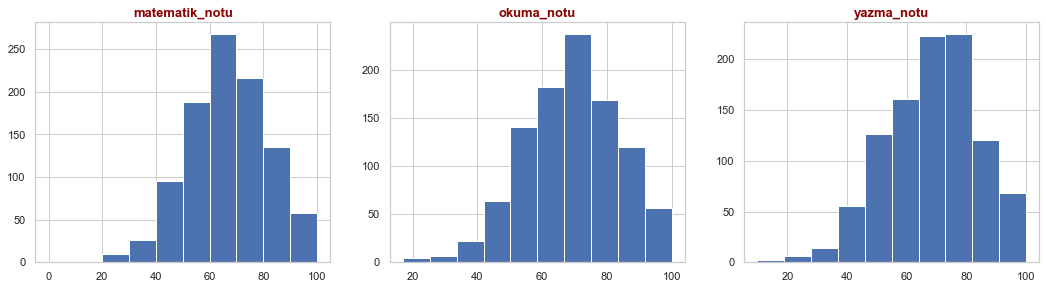

In [3]:
plt.figure(figsize=(18,15))


degiskenler = ['matematik_notu', 'okuma_notu' , 'yazma_notu']

for i in range(3):
    plt.subplot(3, 3, i+1)
    plt.hist(ogrenciler[degiskenler[i]])
    plt.title(degiskenler[i], fontdict=baslik_font)

plt.show()

In [4]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

ozellikler = ["matematik_notu", "okuma_notu", "yazma_notu"]
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera(ogrenciler[ozellik])
    norm_stats = normaltest(ogrenciler[ozellik])
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,matematik_notu,15.91226,0.00035,15.40896,0.00045
1,okuma_notu,11.38330,0.00337,11.11741,0.00385
2,yazma_notu,13.98509,0.00092,13.60645,0.00111


p değerleri 0.05'den küçük olduğu için normal dağılıma uyduğunu söyleyemeyiz.
Logunu alıp tekrar deneyelim

In [5]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

ozellikler = ["matematik_notu", "okuma_notu", "yazma_notu"]
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera(np.log(ogrenciler[ozellik]))
    norm_stats = normaltest(np.log(ogrenciler[ozellik]))
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,matematik_notu,nan,nan,nan,nan
1,okuma_notu,495.12732,0.00000,209.77151,0.00000
2,yazma_notu,1410.93701,0.00000,318.96921,0.00000


p değeri log aldığımızda da 0.05 den küçük çıktığı için log dönüşümünün da normal dağılıma uymadığı söyleyebiliriz

Verileri şimdi normalize edelim

In [6]:
from sklearn.preprocessing import normalize

ogrenciler["norm_matematik_notu"] = normalize(np.array(ogrenciler["matematik_notu"]).reshape(1,-1)).reshape(-1,1)
ogrenciler["norm_okuma_notu"] = normalize(np.array(ogrenciler["okuma_notu"]).reshape(1,-1)).reshape(-1,1)
ogrenciler["norm_yazma_notu"] = normalize(np.array(ogrenciler["yazma_notu"]).reshape(1,-1)).reshape(-1,1)
normal_ozellikler=["matematik_notu","norm_matematik_notu","okuma_notu","norm_okuma_notu",
                    "yazma_notu","norm_yazma_notu"]


print('Minimum Değer\n-----------------',)
print(ogrenciler[normal_ozellikler].min())
print('\nMaksimum Değer\n-----------------',)
print(ogrenciler[normal_ozellikler].max())

Minimum Değer
-----------------
matematik_notu         0.00000
norm_matematik_notu    0.00000
okuma_notu            17.00000
norm_okuma_notu        0.00760
yazma_notu            10.00000
norm_yazma_notu        0.00454
dtype: float64

Maksimum Değer
-----------------
matematik_notu        100.00000
norm_matematik_notu     0.04664
okuma_notu            100.00000
norm_okuma_notu         0.04473
yazma_notu            100.00000
norm_yazma_notu         0.04535
dtype: float64


Normalleştirdiğimiz değerleri grafik üzerinde görelim

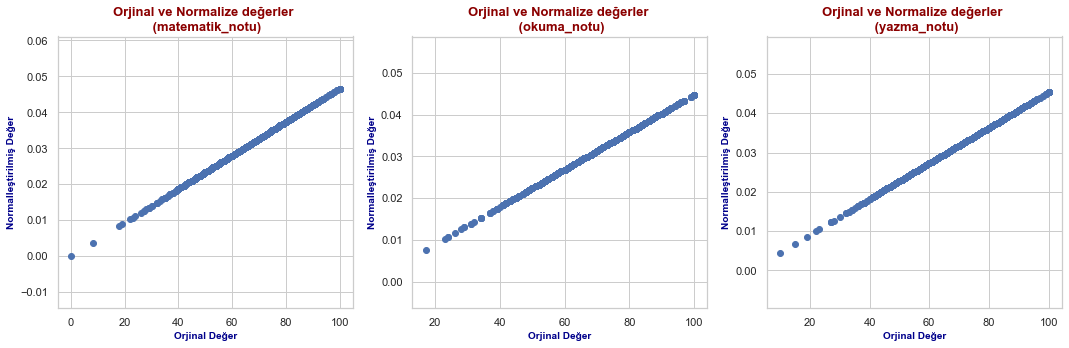

In [7]:
plt.figure(figsize=(18,5))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.scatter(ogrenciler[normal_ozellikler[2*i]], ogrenciler[normal_ozellikler[2*i+1]])
    plt.title("Orjinal ve Normalize değerler \n ({})".format(normal_ozellikler[2*i]), fontdict=baslik_font)
    plt.xlabel("Orjinal Değer", fontdict=eksen_font)
    plt.ylabel("Normalleştirilmiş Değer", fontdict=eksen_font)

plt.show()

2. Üç sınav sonucunu tek bir değişkende, hedef değişkeni olarak tutmak istiyoruz. 
Bunun için üç sınavın ortalamasını içeren yeni bir değişken tanımlayın. 
Bu yeni değişkenin ortalamasının normal dağılımlı olup olmadığını test edin. 
Eğer normal dağılıma sahip değilse dönüşüm yaparak normal dağılımlı hale getirmeye çalışın ve dönüşümün sonucunu test edin.

In [8]:
ogrenciler["not_ortalama"]=(ogrenciler["matematik_notu"]+ogrenciler["okuma_notu"]+ogrenciler["yazma_notu"])/3

In [9]:
ogrenciler.head()

,cinsiyet,koken,aile_egt_seviyesi,ogle_yemegi,hazirlik_kursu,matematik_notu,okuma_notu,yazma_notu,norm_matematik_notu,norm_okuma_notu,norm_yazma_notu,not_ortalama
0,female,group B,bachelor's degree,standard,none,72,72,74,0.03358,0.03221,0.03356,72.66667
1,female,group C,some college,standard,completed,69,90,88,0.03218,0.04026,0.03991,82.33333
2,female,group B,master's degree,standard,none,90,95,93,0.04197,0.04250,0.04218,92.66667
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.02192,0.02550,0.01995,49.33333
4,male,group C,some college,standard,none,76,78,75,0.03545,0.03489,0.03401,76.33333


In [10]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

ozellikler = ["not_ortalama"]
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera(ogrenciler[ozellik])
    norm_stats = normaltest(ogrenciler[ozellik])
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,not_ortalama,15.45339,0.00044,15.18672,0.00050


In [11]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

ozellikler = ["not_ortalama"]
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera(np.log(ogrenciler[ozellik]))
    norm_stats = normaltest(np.log(ogrenciler[ozellik]))
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,not_ortalama,2167.03935,0.00000,361.83694,0.00000


orjinal veriler ve log dönüşümü normal dağılıma uymuyor

Verileri standartlaştırıyoruz

In [12]:
from sklearn.preprocessing import scale

ogrenciler["olcekli_not_ortalama"] = scale(ogrenciler["not_ortalama"])

olcekli_ozellikler=["not_ortalama","olcekli_not_ortalama"]

print('Standart Sapmalar\n-----------------',)
print(ogrenciler[olcekli_ozellikler].std())
print('\nOrtalamalar\n-----------------',)
print(ogrenciler[olcekli_ozellikler].mean())

Standart Sapmalar
-----------------
not_ortalama           14.25733
olcekli_not_ortalama    1.00050
dtype: float64

Ortalamalar
-----------------
not_ortalama           67.77067
olcekli_not_ortalama    0.00000
dtype: float64


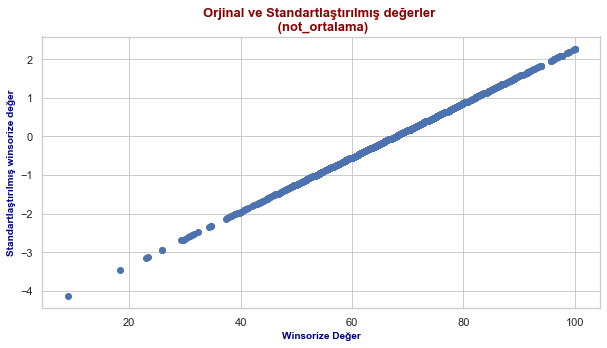

In [13]:
plt.figure(figsize=(10,5))

plt.scatter(ogrenciler[olcekli_ozellikler[0]], ogrenciler[olcekli_ozellikler[1]])
plt.title("Orjinal ve Standartlaştırılmış değerler \n ({})".format(olcekli_ozellikler[0]), fontdict=baslik_font)
plt.xlabel("Winsorize Değer", fontdict=eksen_font)
plt.ylabel("Standartlaştırılmış winsorize değer", fontdict=eksen_font)

plt.show()

3. Bir önceki soruda oluşturduğumuz hedef değişkeni ile hangi değişkenler ilişkili görünüyor? 
Eğer amacımız sınav başarısını belirleyen etkenleri açıklamak olsaydı hangi değişkenleri veri kümemizde tutmamız gerekirdi?

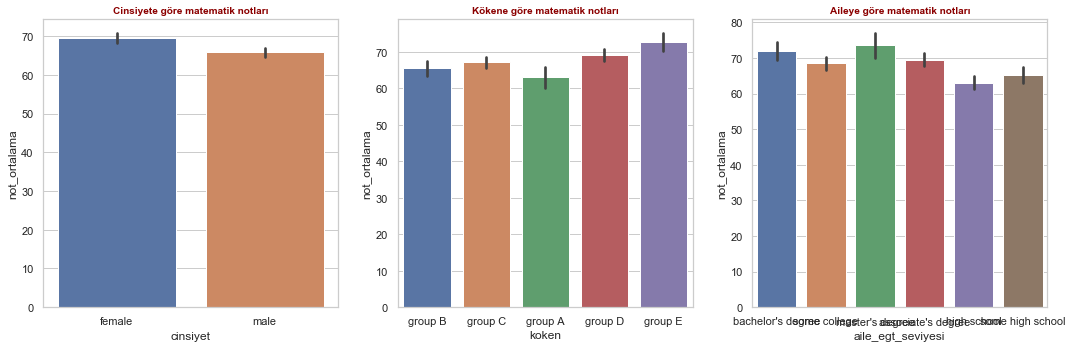

In [17]:
plt.figure(figsize=(18,18))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 10 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 2 }

plt.subplot(3,3,1)
sns.barplot(ogrenciler["cinsiyet"], ogrenciler["not_ortalama"])
plt.title("Cinsiyete göre matematik notları", fontdict = baslik_font)

plt.subplot(3,3,2)
sns.barplot(ogrenciler["koken"], ogrenciler["not_ortalama"])
plt.title("Kökene göre matematik notları", fontdict = baslik_font)


plt.subplot(3,3,3)
sns.barplot(ogrenciler["aile_egt_seviyesi"], ogrenciler["not_ortalama"])
plt.title("Aileye göre matematik notları", fontdict = baslik_font)


plt.show()

Not ortalamaları cinsiyete, kökene ve aileye göre değişiklik gösteriyor. Bu değişkenleri veri kümemizde tutmamız gerekir.